In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
import matplotlib.colors
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [2]:
data_categories = {'SNPs':"Genetics",
                   'CNV':"Genetics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genetics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "Other",
                   'WES':"Genetics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genetics",
                   'genotype':"Genetics",
                   "Copy number alterations":"Genetics",
                   "Fusions":"Genetics",
                   "Mutations":"Genetics"}

data_categories_v2 = {'SNPs':"SNPs",
                   'CNV':"CNV",
                   'CpGs (methylation)':"CpGs (methylation)",
                   'SNV':"SNV",
                   'mRNA (gene expression)': "mRNA (gene expression)",
                   'miRNA':"miRNA",
                   'sc-transcriptomics': "sc-transcriptomics",
                   'sc-ATAC':"sc-ATAC",
                   'proteome': "proteome",
                   'clinical': "clinical",
                   'ncRNA':"other",
                   'other': "other",
                   'WES':"WES/WGS",
                   'ChIP-seq':"ChIP-seq",
                   'WGS':"WES/WGS",
                   'genotype':"SNPs",
                   "Copy number alterations":"CNV",
                   "Fusions":"other",
                   "Mutations":"SNV"}


model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Visible neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph neural network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Other",
    'ensemble (MAE)':"Other",
    'fuzzy network':"Other",
    'Gaussian-Proces':"Other",
    'PCA-like':"Other",
    'LSTM':'Other',
    'ANN':"Dense neural network",
    'VNN (CNN)':"Visible neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Convolutional neural network",
    'Dense neural network':"Dense neural network",
    'Transformer':"Transformer",
    'Capsule Network':"Other",
    'Factor Graph Neural Network':"Graph neural network",
    'Self-organising maps (SOM)':"Other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph neural network",
    'meta-learning':"Other",
    'Generative adversarial network (GAN)':"Other"
}

sns.set_theme(style="whitegrid", font_scale=1.3)

In [3]:
outPath = "figures"

In [16]:
pd_table1 = pd.read_csv("data/Table_5.csv")

In [17]:
df = pd_table1.copy()

df = df[df['Bulk/single cell']!="other"]
df["Task"] = df['Bulk/single cell'].str.split(", ")

df = df["Task"].explode()

vals = (df.value_counts() / df.value_counts().sum())*100
vals

Task
Bulk           80.833333
Single-cell    19.166667
Name: count, dtype: float64

In [14]:
df = pd_table1.copy()
df = df[df['Bulk/single cell']!="other"]
df["Task"] = df['Bulk/single cell'].str.split(", ")
df = df[df['Bulk/single cell'] == "Single-cell"]
df["Data type"].value_counts()
# df["Data type"]

Data type
sc-transcriptomics                                     11
sc-ATAC, sc-transcriptomics                             2
other, sc-transcriptomics                               2
mRNA (gene expression), sc-transcriptomics              2
SNPs, mRNA (gene expression)                            1
SNV, mRNA (gene expression), other                      1
proteome, sc-ATAC, sc-transcriptomics                   1
mRNA (gene expression)                                  1
mRNA (gene expression), sc-ATAC, sc-transcriptomics     1
Name: count, dtype: int64

In [29]:
df["cat"].unique()

array(['Genetics', 'Epigenetics', 'Transcriptomics', 'Proteomics',
       'Clinical', 'Other'], dtype=object)

In [34]:
pd_Table_1_data_type = pd_table1.copy()
pd_Table_1_data_type = pd.concat([pd_Table_1_data_type, pd_Table_1_data_type['Data type'].str.split(', ', expand=True)], axis=1)
df_merged = pd.concat([pd_Table_1_data_type[0], pd_Table_1_data_type[1], pd_Table_1_data_type[2], pd_Table_1_data_type[3],pd_Table_1_data_type[4],pd_Table_1_data_type[5]], ignore_index=True)

df = pd.DataFrame(df_merged.value_counts())
df = df.loc[list(data_categories.keys()),]
df["cat"] = data_categories.values()

cat_list = []
labels_list = []
for cat in df["cat"].unique():
    cat_list.append(df[df["cat"] == cat]["count"].astype("int64").tolist())
    labels_list.append(df[df["cat"] == cat].index.tolist())

print(cat_list)
print(labels_list)

[[21, 15, 9, 3, 2, 3, 1, 1, 1], [17, 10, 4, 1, 2], [68, 20], [3], [7], [7]]
[['SNPs', 'CNV', 'SNV', 'WES', 'WGS', 'genotype', 'Copy number alterations', 'Fusions', 'Mutations'], ['CpGs (methylation)', 'miRNA', 'sc-ATAC', 'ncRNA', 'ChIP-seq'], ['mRNA (gene expression)', 'sc-transcriptomics'], ['proteome'], ['clinical'], ['other']]


In [98]:
basecol = 0

outer_colors = []
for i, cm in enumerate(["#e4bb3dff", "#219a55ff", "#5d7aa2ff", "#57423dff","#d13942ff", "#bfa7a0ff"]):  #["Blues", "Oranges", "Greens", "RdPu", "Purples",'Greys']):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [cm,"#ffffffff"])    #plt.colormaps[cm] 
    outer_colors.append(cmap(basecol))

    if i == 0:
        inner_colors = cmap(np.linspace(0.4,.9, num=len(cat_list[i])))
    else:
        inner_colors = np.append(inner_colors,  cmap(np.linspace(0.1,.7, num=len(cat_list[i]))), axis=0)

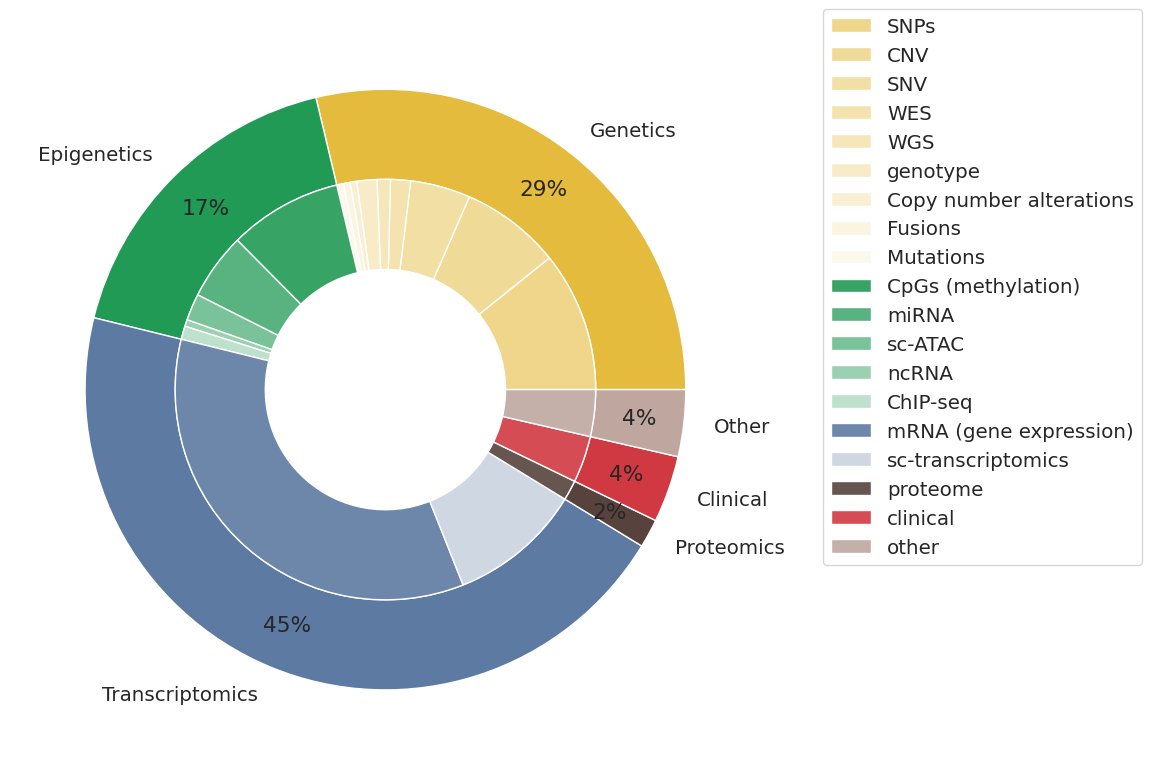

In [103]:
fig, ax = plt.subplots(figsize=(15,8))

size = 0.3
outervals = list(map(sum, cat_list))
innervals = [j for i in cat_list for j in i]
outer_labels = df["cat"].unique().tolist()
inner_labels = [j for i in labels_list for j in i]

cmap = plt.colormaps["tab20c"]
patches_outer, texts_outer, pct = ax.pie(outervals, radius=1, colors=outer_colors, labels=outer_labels, autopct='%1.0f%%', pctdistance=.85,
       wedgeprops=dict(width=size, edgecolor='w'))
patches_inner, texts_inner = ax.pie(innervals, radius=1-size, colors=inner_colors, #labels=inner_labels, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(patches_inner, inner_labels, bbox_to_anchor=(1.07, 1.02))
fig.tight_layout()
fig.savefig(os.path.join(outPath, "datatypes_piePlot.png"), dpi=300)

In [9]:
#pip install upsetplot!

from upsetplot import UpSet
from upsetplot import from_memberships

In [10]:
df = pd_table1.copy()

df.replace(data_categories_v2, inplace=True, regex=True)

# Splitting the 'Data type' column into separate binary columns
data_types_expanded = df['Data type'].str.get_dummies(sep=', ')  #### changed to ", " instead of ","

df_expanded = pd.concat([df[["Title"]], data_types_expanded], axis=1)
df_expanded = df_expanded.set_index(["Title"])
df_expanded.replace(data_categories_v2, inplace=True)

# df_expanded  = df_expanded.T

df_expanded.to_csv("data/data_types_expanded.csv")

# Transciptomics & multi-omcs applications

In [24]:
df = pd_Table_1_data_type[pd_Table_1_data_type['Data type'].str.contains('mRNA|sc-transcriptomics', na=False)]
print(df.shape)

# For the second part, if you are looking to check if all of the columns 0 to 5 are either "mRNA", "sc-transcriptomics", or NaN, this requires a bit more complex logic:
mask_only = df.apply(lambda row: all(item in ['mRNA (gene expression)', 'sc-transcriptomics', None, np.nan] for item in row[[0, 1, 2, 3, 4, 5]]), axis=1)

# Then you can apply these masks to your DataFrame
df = df[~mask_only]
df



(37, 27)


,Name,Data type,Bulk/single cell,Which level,Model architecture,Passive vs. Active Approaches,Taxonomy (Table 3. Zhan et al),Post-hoc interpretation method,Interpretation strategy,Prior knowledge,...,Year,Task,Applications to,Notes,0,1,2,3,4,5
2,https://www.nature.com/articles/s41586-021-039...,"CNV, CpGs (methylation), Fusions, SNV, mRNA (g...",Bulk,"Genes, Pathways, SNPs",VNN (dense),"active, passive","attribution, global, hidden semantics",DeepLIFT,"backpropagation-based, prior knowledge","Gene-annotations, Reactome",...,2021,classification (supervised),Oncology,NaN,CNV,CpGs (methylation),Fusions,SNV,mRNA (gene expression),None
3,https://journals.plos.org/ploscompbiol/article...,"mRNA (gene expression), miRNA",Bulk,miRNA,AE,passive,"attribution, global, hidden semantics",NaN,permutation,NaN,...,2022,clustering (unsupervised),Oncology,NaN,mRNA (gene expression),miRNA,None,None,None,None
7,https://www.biorxiv.org/content/10.1101/2022.0...,"CNV, CpGs (methylation), mRNA (gene expression)",Bulk,"Genes, Protein",Graph Convolutional Network (GCN),"active, passive","attribution, semi-local",LRP (Layerwise Relevance Propagation),"attention, backpropagation-based, prior knowledge",StringDB,...,2022,classification (supervised),Oncology,NaN,CNV,CpGs (methylation),mRNA (gene expression),None,None,None
9,https://bmcbioinformatics.biomedcentral.com/ar...,"CNV, CpGs (methylation), mRNA (gene expression...",Bulk,Pathways,AE,passive,"attribution, local",SHAP,"game theory, prior knowledge","KEGG, NCI, Reactome",...,2020,clustering (unsupervised),Oncology,NaN,CNV,CpGs (methylation),mRNA (gene expression),miRNA,None,None
13,https://www.sciencedirect.com/science/article/...,"sc-ATAC, sc-transcriptomics",Single-cell,"Cells, Genes",VAE,passive,"attribution, hidden semantics, local",NaN,perturbation,NaN,...,2021,clustering (unsupervised),Other,NaN,sc-ATAC,sc-transcriptomics,None,None,None,None
17,https://www.science.org/doi/10.1126/science.aa...,"SNPs, mRNA (gene expression)",Single-cell,"Cell type, Gene sets, Genes, Pathways",VNN (dense),active,"attribution, global, hidden semantics",NaN,"connection-weights, prior knowledge","ENCODE, Own data",...,2018,classification (supervised),neurological disorders,\nimputed genotypes; intermediate phenotype da...,SNPs,mRNA (gene expression),None,None,None,None
21,https://academic.oup.com/bioinformatics/articl...,"CNV, CpGs (methylation), mRNA (gene expression)",Bulk,"Genes, Pathways",VNN (CNN),passive,"attribution, local",GradCAM,prior knowledge,KEGG,...,2021,classification (supervised),Oncology,NaN,CNV,CpGs (methylation),mRNA (gene expression),None,None,None
23,https://arxiv.org/abs/2207.09783,"mRNA (gene expression), miRNA",Bulk,Genes,AE (vector quantized),passive,"global, hidden semantics",NaN,visualisation,NaN,...,2022,clustering (unsupervised),Oncology,cant find sample size and inputsize,mRNA (gene expression),miRNA,None,None,None,None
30,https://www.frontiersin.org/articles/10.3389/f...,"CNV, mRNA (gene expression), proteome",Bulk,"Genes, Pathways","AE, Graph Convolutional Network (GCN)",passive,"attribution, global, hidden semantics",NaN,"connection-weights, permutation, perturbation",NaN,...,2022,classification (supervised),Oncology,Interpretation through sensitivity analysis (G...,CNV,mRNA (gene expression),proteome,None,None,None
39,https://www.biorxiv.org/content/10.1101/2021.1...,"CpGs (methylation), mRNA (gene expression)",Bulk,"Genes, Pathways","ANN, VAE (sparse)","active, passive","attribution, local",NaN,"attention, permutation",Hallmark (MSigDB),...,2021,"clustering (unsupervised), regression (supervi...",Oncology,NaN,CpGs (methylation),mRNA (gene expression),None,None,None,None


In [9]:
df_merged = pd.concat([pd_Table_1_data_type[0], pd_Table_1_data_type[1], pd_Table_1_data_type[2], pd_Table_1_data_type[3],pd_Table_1_data_type[4],pd_Table_1_data_type[5]], ignore_index=True)

df = pd.DataFrame(df_merged.value_counts())
df

,0
mRNA (gene expression),68
SNPs,21
sc-transcriptomics,20
CpGs (methylation),17
CNV,15
miRNA,10
SNV,9
clinical,7
other,7
sc-ATAC,4
